<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">LAB 5.3</div><br/>
<div style="font-size: 18pt;">- Predicting handwritten digits in MNIST dataset with MLP</div><br/><br/>
<div style="font-size: 18pt;">- Homework 3 described at the end of this Jupyter Notebook</div><br/>

In [1]:
# check MNIST data information
# https://en.wikipedia.org/wiki/MNIST_database

In [1]:
from keras.datasets import mnist

2023-03-21 08:41:47.450466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset = mnist.load_data()

(Xtrain, ytrain), (Xtest, ytest) = dataset

n_train = len(Xtrain)
n_test = len(Xtest)

n_features = 28*28

Xtrain = Xtrain.reshape( n_train, n_features )
Xtest  = Xtest.reshape( n_test, n_features )

In [4]:
Xtrain[0].shape

(784,)

In [5]:
28*28

784

In [2]:
from matplotlib import pyplot as plt
import numpy as np

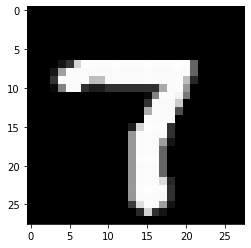

In [7]:
plt.imshow( np.reshape( Xtrain[10002], (28,28) ) , cmap=plt.cm.gray)
plt.show()

In [8]:
Xtrain.shape

(60000, 784)

In [9]:
Xtest.shape

(10000, 784)

In [3]:
from sklearn.neural_network import MLPClassifier

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(1,), verbose=True)

In [12]:
# check info on MLPClassifer in sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [13]:
clf.fit(Xtrain, ytrain)

Iteration 1, loss = 2.38659692
Iteration 2, loss = 2.31960728
Iteration 3, loss = 2.30574034
Iteration 4, loss = 2.30215797
Iteration 5, loss = 2.30142002
Iteration 6, loss = 2.30125992
Iteration 7, loss = 2.30123763
Iteration 8, loss = 2.30124920
Iteration 9, loss = 2.30124086
Iteration 10, loss = 2.30123460
Iteration 11, loss = 2.30124406
Iteration 12, loss = 2.30124785
Iteration 13, loss = 2.30123205
Iteration 14, loss = 2.30124338
Iteration 15, loss = 2.30124912
Iteration 16, loss = 2.30124199
Iteration 17, loss = 2.30125117
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(1,), verbose=True)

In [14]:
help(clf)

Help on MLPClassifier in module sklearn.neural_network._multilayer_perceptron object:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identit

In [15]:
print(clf.coefs_)

[array([[ 5.18536970e-115],
       [-8.75708216e-104],
       [ 6.69337131e-113],
       [-6.05990646e-103],
       [ 1.33822847e-109],
       [-1.78893567e-111],
       [ 7.79470471e-115],
       [-1.50586626e-113],
       [ 5.79259243e-103],
       [-5.47952967e-108],
       [-1.42209670e-108],
       [ 1.78345489e-115],
       [ 1.37425579e-109],
       [ 1.50153462e-113],
       [ 3.28528221e-112],
       [-2.55569439e-103],
       [ 2.14530094e-114],
       [-1.30669597e-109],
       [-1.72706162e-106],
       [ 7.89829092e-108],
       [-1.99460830e-113],
       [-5.17149538e-105],
       [ 1.71037528e-115],
       [-3.22581984e-110],
       [-1.39258120e-109],
       [-1.59930676e-108],
       [ 2.73509387e-108],
       [ 1.73459403e-114],
       [ 1.34048475e-108],
       [-1.73382540e-114],
       [ 1.25182027e-108],
       [ 1.04654594e-109],
       [-1.15406936e-113],
       [-5.15050275e-103],
       [ 7.44364467e-104],
       [-7.91014321e-113],
       [-5.45419448e-105],


In [16]:
len(clf.coefs_)

2

In [17]:
clf.coefs_[0].shape
#explain the dimension of the W matrix for the first (hidden) layer

(784, 1)

In [18]:
clf.coefs_[1].shape
#explain the dimension of the W matrix for the second (output) layer

(1, 10)

In [19]:
clf.intercepts_[0].shape
#explain the dimension of the b (bias) vector for the first (hidden) layer

(1,)

In [20]:
clf.intercepts_[1].shape
#explain the dimension of the b (bias) vector for the second (output) layer

(10,)

In [21]:
clf.score(Xtrain, ytrain)

0.11236666666666667

In [22]:
clf.score(Xtest, ytest)

0.1135

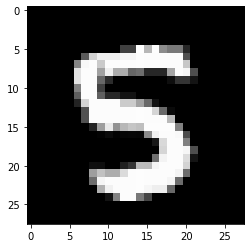

In [23]:
plt.imshow( np.reshape( Xtest[120], (28,28) ) , cmap=plt.cm.gray)
plt.show()

In [24]:
clf.predict(Xtest[120].reshape(1, -1))

array([1], dtype=uint8)

In [25]:
class MyMLP:
    def __init__(self, n_input, n_hidden, n_output, random_seed = 0, activate='sigmoid', verbose=False):
        np.random.seed( random_seed )
        # biases for hidden layer
        self.b_hidden = np.random.randn( 1,n_hidden )
        # weights for hidden layer
        self.w_hidden = np.random.randn( n_input, n_hidden ) / np.sqrt(n_input+n_hidden)    # Glorot Initialization
        # biases for output layer
        self.b_output = np.random.randn( 1, n_output )
        # weights for hidden layer
        self.w_output = np.random.randn( n_hidden, n_output ) / np.sqrt(n_hidden+n_output)
        
        self.verbose = verbose
        if activate=='sigmoid':
            self.activate = self.sigmoid
            self.activate_der = self.sigmoid_der
        else:
            self.activate = self.tanh
            self.activate_der = self.tanh_der

        
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_der(self,x):
        g = 1.0/(1.0+np.exp(-x))
        return g, g*(1.0-g)
    
    def tanh(self,x):
        return np.tanh(x)
    
    def tanh_der(self,x):
        g = np.tanh(x)
        return g, 1.0-g**2

    def softmax(self,x):
        x -= np.max(x,axis=1,keepdims=True)
        x  = np.exp(x)
        x /= np.sum(x,axis=1,keepdims=True)
        return x
        
    def predict(self, X):
        # X.shape = (m,n_input)
        Z1 = X.dot(self.w_hidden) + self.b_hidden
        # Z1.shape = (m,n_hidden)
        A1 = self.activate( Z1 )
        # A1.shape = (m,n_hidden)
        Z2 = A1.dot(self.w_output) + self.b_output
        # Z2.shape = (m,n_output)
        A2 = self.softmax( Z2 )
        # A2.shape = (m,n_output)
        return A2
    
    def predict_class(self, X):
        yhat = self.predict(X)
        # pred.shape = (m,n_output)
        # np.argmax( pred , axis=1 ).shape = (m,)
        return np.argmax( yhat , axis=1 )
    
    def score(self,X,y):
        return np.mean( self.predict_class(X) == y )
    
    # cross-entropy
    def loss(self, X, y):
        yhat = self.predict(X)
        return - np.mean( np.log( yhat[ range(len(yhat)), y ] ) )
    
    def fit(self, Xtrain, ytrain, epochs = 100, learning_rate = 0.1):
        m,_ = Xtrain.shape
        
        for iter in range(epochs):  
            # Forward propagation
            # X.shape = (m,n_input)
            Z1 = Xtrain.dot(self.w_hidden) + self.b_hidden
            # Z1.shape = (m,n_hidden)
            A1,dZ1 = self.activate_der( Z1 )
            # A1.shape = (m,n_hidden)
            Z2 = A1.dot(self.w_output) + self.b_output
            # Z2.shape = (m,n_output)
            A2 = self.softmax( Z2 )
            # A2.shape = (m,n_output)

            # Backward propagation
#             delta2 = (A2-ytrain_one_hot)/m
            delta2 = A2
            delta2[ range(len(delta2)), ytrain ] -= 1
            delta2 /= len(delta2)
        
            delta1 = delta2.dot( self.w_output.T ) * dZ1

            dw_output = A1.T.dot(delta2)
            dw_hidden = Xtrain.T.dot(delta1)

            db_output = np.sum( delta2, axis=0, keepdims=True )
            db_hidden = np.sum( delta1, axis=0, keepdims=True )
            
            
            # Gradient descent
            self.w_hidden -= (learning_rate * dw_hidden)
            self.b_hidden -= (learning_rate * db_hidden)
            self.w_output -= (learning_rate * dw_output)
            self.b_output -= (learning_rate * db_output)
            
            if self.verbose:
                print("Loss after iteration %i: %f (score=%.2f%%)" %(iter, self.loss(Xtrain, ytrain), 100.0*self.score(Xtrain,ytrain)))
        return 0

In [26]:
mlp = MyMLP(1, 1, 1, random_seed=0, activate='tanh', verbose=True)

In [27]:
mlp.fit( Xtrain, ytrain)

ValueError: shapes (60000,784) and (1,1) not aligned: 784 (dim 1) != 1 (dim 0)

In [ ]:
mlp.score( Xtest, ytest )

# Homework 3
Load MNIST fashion dataset, it has the same dimensions as MNIST dataset <br/>
https://keras.io/api/datasets/fashion_mnist/  <br/> 
Go to the sklearn MLPClassifier website, learn about parameters and try different ones to achieve the 
best accuracy on the test set <br/>
Comment on bias (overfitting) and variance (underfitting) <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [5]:
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

In [6]:
dataset = fashion_mnist.load_data()

(Xtrain, ytrain), (Xtest, ytest) = dataset

n_train = len(Xtrain)
n_test = len(Xtest)

n_features = 28*28

Xtrain = Xtrain.reshape( n_train, n_features )
Xtest  = Xtest.reshape( n_test, n_features )

In [7]:
Xtrain[0].shape

(784,)

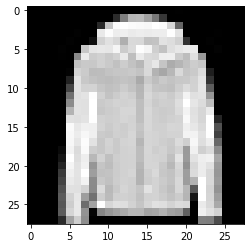

In [8]:
plt.imshow( np.reshape( Xtrain[5000], (28,28) ) , cmap=plt.cm.gray)
plt.show()

In [9]:
ytrain[20]

3

In [122]:
clf = MLPClassifier(hidden_layer_sizes=(28*28,100,50,25,10),max_iter= 20,activation = 'relu',
                    solver='adam',learning_rate_init=0.01,random_state=1, verbose=True)

90 overfits with 28*28 392 196 112 56 28 1 of 98% 89% with relu<br>
134 overfits with 28*28 98 84 56, 28, 14, 10 of 98% 89% with relu<br>
50  overfits with 28*28 96 48 24 10 of 95% 89% with relu <br>
50 overfits with 28*28 48 28 10 of 94% 88% with relu<br>
50 underfit but acceptable with 28*28 28 28 28 10 of 92% 88% with relu<br>
62 underfit with 28*28 48 28 10 of 86% 85% whith identity<br>
91 underfit with 28*28 28 10 of 0.86% 0.83% identity<br>
50 underfit with 28*28 48 28 10 of 78% 78% whith logistic<br>



In [123]:
import time
start = time.time()
clf.fit(Xtrain, ytrain)
stoptime = time.time() -start;
stoptime

Iteration 1, loss = 3.26929657
Iteration 2, loss = 2.30373588
Iteration 3, loss = 2.30373077
Iteration 4, loss = 2.30379214
Iteration 5, loss = 2.30385570
Iteration 6, loss = 2.30378207
Iteration 7, loss = 2.30374245
Iteration 8, loss = 2.30387725
Iteration 9, loss = 2.30392879
Iteration 10, loss = 2.30387713
Iteration 11, loss = 2.30381141
Iteration 12, loss = 2.30380804
Iteration 13, loss = 2.30377857
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


56.46983289718628

In [124]:
clf.score(Xtrain, ytrain)

0.1

In [110]:
clf.score(Xtest, ytest)

0.8771